# 인공지능 평가과제 2024년 1학기 (15점)

201901785 통계학과 백준홍  

## 제출기한
- ~ 2024년 6월 12일(수) 23:30 
- 구름edu에 제출

## 인공지능 주제  
트렌스포머(Transformer)에 대한 동작 설명 자료  
- 기술적인 내용을 파악하고 정리 (주피터 노트에 작성)  
- 설명 동영상을 통해 기술적인 내용 설명  

## 제출 항목
- 인공지능 소스 파일 (*.ipynb)  
- 인공지능 설명 동영상 파일 (*.mp4)  
-> 압축 파일 (*.zip) or GitHub url (url.txt)

---

.

.

.

트렌스포머 동작원리에 대해서 설명하게 된 통계학과 백준홍입니다.  
설명 진행해보도록 하겠습니다.  

## 트랜스포머(Transformer)

RNN이나 CNN을 사용하지 않고 Attention 기법만을 사용  
- 순서에 대한 정보를 주기 위해 Positional Encoding을 사용

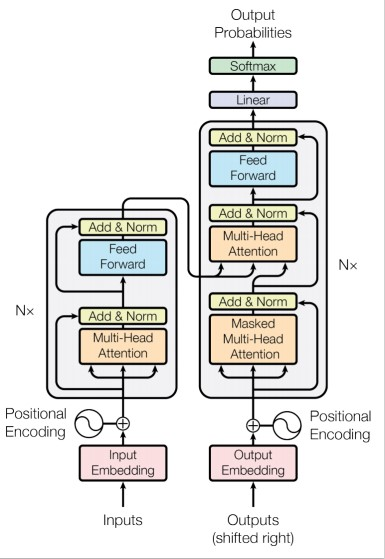

## 트랜스포머의 동작 원리  

### 입력 값 임베딩(Embedding)

트랜스포머 이전의 전통적인 임베딩은 다음과 같습니다.

먼저 임베딩 과정을 거쳐서 더욱 더 작은 차원의 continuous 값으로 표현합니다.  
즉 어떠한 실수값으로 표현이 가능하다는 의미합니다.  

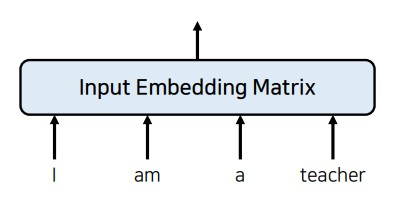

RNN을 사용하지 않으려면 위치 정보를 포함하고 있는 임베딩을 사용해야 합니다.  
- 이를 위해 트랜스포머에서는 Positional Encoding을 사용합니다.   

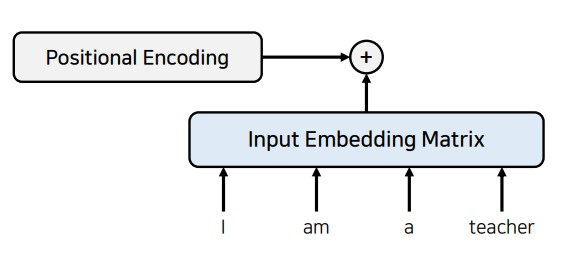

임베딩이 끝난 이후에 어텐션(Attention)을 진행합니다. 

입력문장에 대한 정보와 실제 위치에 대한 정보가 포함된 정보값을  
입력으로 받아 어텐션을 수행합니다.  

인코더 부분에서 수행하는 어텐션은 self-attention 이라고 하며  
각각의 단어들이 서로에게 어떠한 연관성이 있는지 구하기 위해서 사용됩니다.  

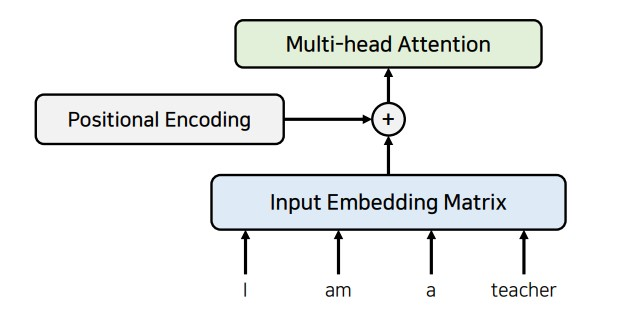

성능 향상을 위해 잔여학습(Residual Learning)을 사용합니다.  
- 특정한 레이어를 건너뛰어 입력할수 있는것을 잔여학습이라고 합니다.  

어텐션을 수행해주고 나온 값과 잔여학습을 통해 바로 더해진 값을 같이 받아서  
정규화(Normalization)까지 수행한 뒤에 그 결과를 내보낼수 있도록 만듭니다.

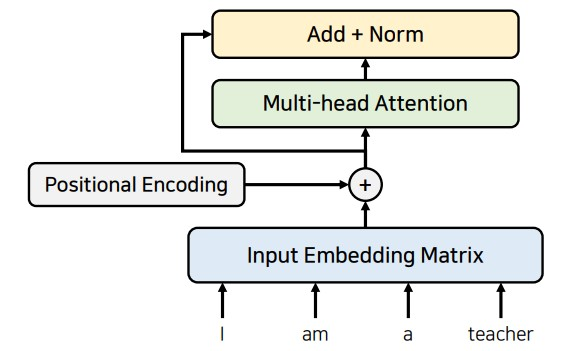

### 인코더(Endoer)  

어텐션(Attention)과 정규화(Normalization) 과정을 반복합니다.  
- 각 레이어는 서로 다른 파라미터를 가집니다.  

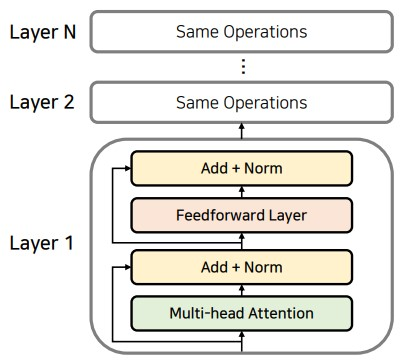

### 인코더(Encoder)와 디코더(Decoder)

여러개의 인코더 레이어를 반복해서 가장 마지막 인코더에서 나온 출력값이   
디코더에 들어가게 됩니다.  

디코더도 마찬가지로 각각 단어 정보를 받아서 각 단어의 상대적인 위치정보를  
알려주기 위해 Positional Encoding 값을 추가하여 넣어줍니다.  

이때 하나의 디코더 레이어에는 2개의 Attention을 사용하는데  
첫번째로 보이는 Attention은 Self Attention 으로 인코더 파트와 마찬가지로  
각각의 단어들이 서로가 서로에게 어떠한 가중치를 가지는지를 구하도록 만들어서  
출력되고 있는 문장에 대한 전반적인 표현을 학습할 수 있도록 만듭니다.  

두번째로 보이는 Attention에서는 인코더에서 얻은 정보를 어텐션 할수 있도록 만듭니다.    
즉 각각의 출력 단어가 인코더의 출력정보를 받아와 사용할수 있도록 만듭니다.  
이는 각각의 출력되고있는 단어가 소스문장에서의 어떤 단어와  
연관성이 있는지 구해줍니다. 그래서 인코더-디코더 어텐션이라고 부릅니다.  

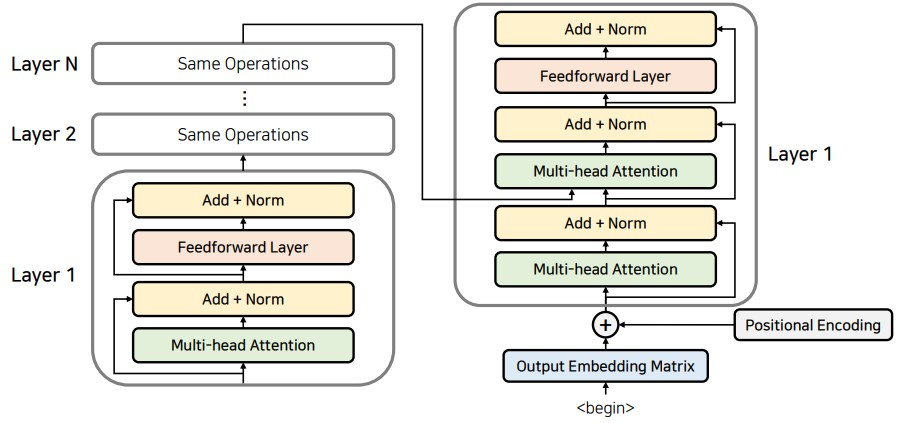

트렌스포머에서는 마지막 인코더 레이어의 출력이 모든 디코더 레이어에 입력됩니다.  
- n_layer = 4일 때의 예시는 다음과 같습니다.  

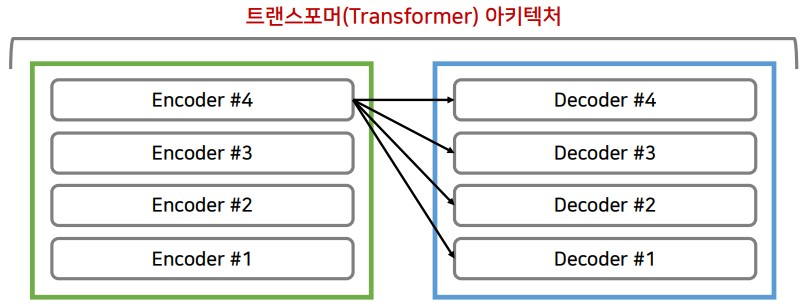

트렌스포머에서도 인코더(Encoder)와 디코더(Decoder)의 구조를 따릅니다.  
- 이때 RNN을 사용하지 않으며 인코더와 디코더를 다수 사용한다는 점이 특징입니다.
- `<eos>`가 나올 때까지 디코더를 이용합니다.  

입력단어가 하나로 쭉 이어져 한번에 입력이 되고 한번에 어텐션값을 구할수 있습니다.  
즉 다시말해, RNN을 사용했을때와 다르게 위치에 대한 정보를 한번에 넣어서  
한번에 인코더를 거칠때마다 병렬적으로 출력값을 구해낼수 있기 때문에  
RNN을 사용했을때와 비교하여 일반적으로 계산복잡도가 낮게 형성됩니다.  

또한 실제로 학습을 수행할때는 이러한 입력값 전체를 한꺼번에 넣을수 있기 때문에  
RNN을 사용하지 않고 학습을 할수 있다는 장점이 있지만 다만 실제 모델에서  
실제 출력값을 내보낼때는 디코더 아키텍쳐를 여러번 사용해서 `<eos>`가 나올때까지  
반복하도록 만들어서 출력값을 구하도록 만듭니다.  

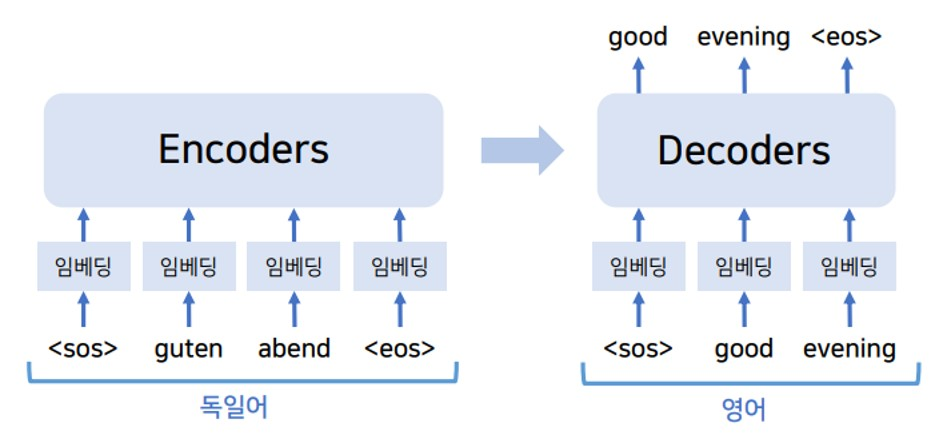

### 어텐션(Attention)  

인코더와 디코더는 Multi-Head Attention 레이어를 사용합니다.  
어텐션을 위한 세 가지 입력 요소
- 쿼리(Query): 물어보는 주체  
- 키(Key): 물어보는 대상  
- 값(Value)  

트랜스포머에서 사용되는 어탠션은 여러개의 head를 가진다고 해서 멀티헤드어텐션이라고 부릅니다.  
그 실제 구조는 다음과 같습니다.  

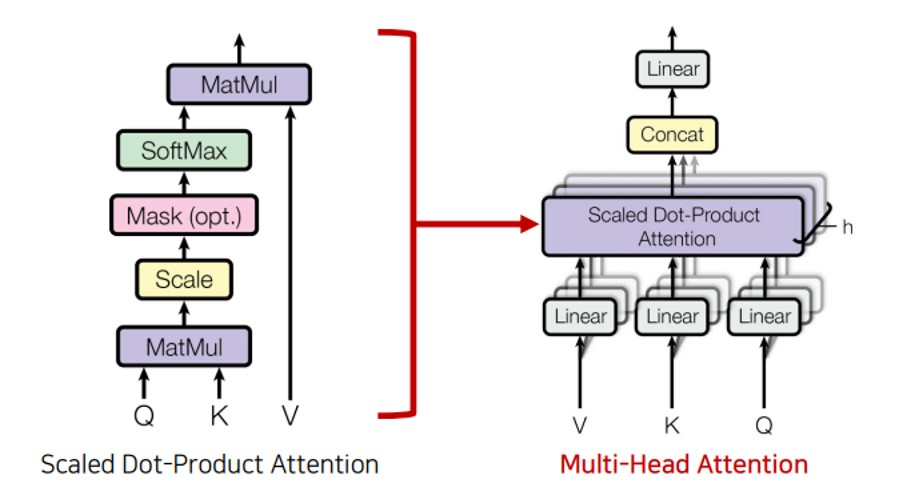


그림의 오른쪽이 바로 멀티헤드어텐션을 보여주는 그림으로 이때 중간에  
Scaled Dot-Product Attention 이 사용되는데 Scaled Dot-Product Attention은  
왼쪽 그림과 같이 구성됩니다.  

물어보는 주체인 Query가 들어오고 각각이 어텐션을 수행할 단어들 그 정보가 key로 들어갑니다.  
그래서 행렬곱을 수행한 뒤에 간단하게 Scaling을 수행해주고 필요하다면 Mask를 수행한뒤에 SoftMax를  
취해서 각각의 key 중에서 어떤 단어와 높은 연관성을 가지는지 비율을 구할수 있고  
그렇게 구해진 확률값과 실제로 value 값을 곱해서 가중치가 적용된 결과적인 어텐션 value를   
구할수 있습니다.  

이와 같은 과정이 Scaled Dot-Product Attention에서 수행되어집니다.  

또한 여기서 참고로 실제로 입력값이 들어욌을때 그러한 입력값들은 h개로 구분됩니다.  
즉 어떠한 입력문장이 들어왔을때 이제 그 값을 value, key, query로 구분되는데 이때  
h개의 서로다른 value, key, query로 구분될수 있도록 만드는 것입니다.  

h개의 서로 다른 어텐션 컨셉을 학습하도록 만들어서 더욱더 구분된 다양한 특징들을  
학습할수 있도록 유도해준다는 장점이 있습니다.  

이와 같이 입력으로 들어온 값은 3개로 복제가 되어서 각각 value, key, query로 들어가게 되고  
이러한 value, key, query값들은 Linear layer 즉 행렬곱을 수행해서 h개로 구분된 각각의 query쌍들을  
만들어내게 되고 여기서 h는 헤드의 갯수이기 때문에 각각 서로다른 헤드끼리  
이렇게 value, key, query쌍을 받아서 어텐션을 수행해서 결과를 내보냅니다.  

이제 그다음에 멀티헤드어텐션의 입력값과 출력값의 디멘션은 같아야 되기 때문에 각각의 헤드로부터  
나오게된 어텐션값들을 concat을 수행해서 일자로 쭉 붙인뒤에 마지막으로 Linear layer를 거쳐서  
output값을 내보내게 됩니다.  

이때 결과적으로 입력값과 출력값의 디멘션이 같도록 만들어서 이러한 멀티헤드어텐션 layer을   
사용한뒤에도 디멘션이 줄어들지 않도록 만듭니다.  

바로 이런식으로 각각의 어텐션 메커니즘이 사용됩니다.   

(이어서)

인코더와 디코더는 Multi-Head Attention 레이어를 사용합니다.  

멀티헤드어텐션 레이어를 수식으로 더 자세히 나타내면 다음과 같습니다.  

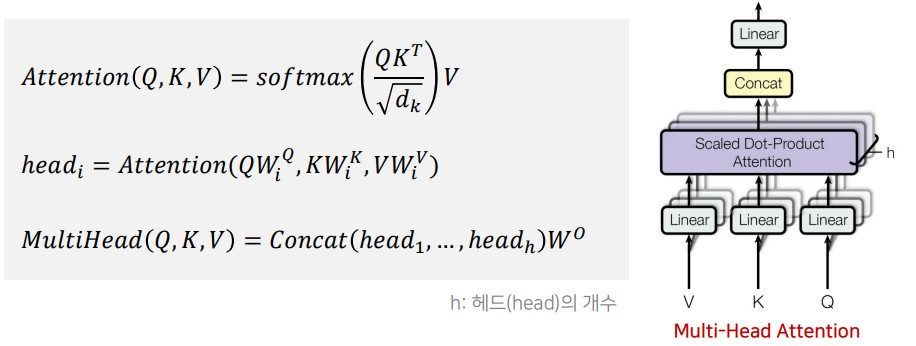

하나의 어텐션은 query, key, value를 받게 되고 이때 query와 key를 곱해서 각 query에 대해서  
각각의 key에 대한 energy값을 구할수 있게 됩니다.  

그러한 energy값에 대해서 확률값으로 표현할수 있도록 만들어서 실제로 어떠한 key에 대해서  
높은 가중치를 가지는지를 계산할수 있고 이때 스케일 벡터로서 루트 d_k를 사용하게 됩니다.  

이때의 d_k는 각각의 key 디멘션이 되고 이때 특정한 스케일로 나눠주는 이유는  
이때 softmax가 가지는 특성을 생각해 보면 0 근처의 위치에서는 gradient값이 높게 형성되는거에 반해  
값이 들죽날쭉 조금씩 왼쪽,오른쪽으로 가게 된다면 gradinet값이 많이 줄어들기 때문에  
gradinet vanishing(기울기 소실) 문제를 피하기 위한 방법으로 스케일 벡터(루트 d_k)를 넣어줍니다.  


결과적으로 이렇게 각각의 query가 각각의 key에 대해서 어떠한 가중치를 가지는지 스코어 값을 구한뒤에  
이제 그 값을 value값과 곱해주어 Attention value를 만들어 줄수 있습니다.  

이때 입력으로 들어오는 각각의 값에 대해서 서로 다른 linear layer(QW_i^Q,KW_i^K,VW_i^V)를  
거치게 만들어서 h개의 서로 다른 각각 query, key, value 값을 만들수 있도록 하는것입니다.  

이런식으로 h개의 서로다른 컨셉을 네트워크가 구분해서 학습하도록 만듬으로서 어텐션을 수행하기 위한  
다양한 feature들을 학습하도록 만듭니다.  

결과적으로 이렇게 각 head에 대한 출력값들을 구할수 있고 이제 이것을 일자로 쭉 붙인뒤에  
마지막으로 아웃풋 메트릭스랑 곱해서 결과적인 MultiHead 값을 구해낼수 있습니다.  

이런식으로 매번 입력값이 들어왔을때 value와 key, query 값으로 각각 들어가게 되고  
나올때는 입력으로 들어왔던 값과 동일한 디멘션을 가지기 때문에 이러한 멀티헤드어텐션 레이어가 포함된  
하나의 인코더 혹은 디코더 레이어는 중첩해서 사용될수 있습니다.  

---

## 트랜스포머의 동작 원리(하나의 단어)

### 쿼리(Query), 키(Key), 값(Value)

어텐션을 위해 쿼리(Query), 키(Key), 값(Value)이 필요합니다.  
각 단어의 임베딩(Embedding)을 이용해 생성할 수 있습니다.  
- 임베딩 차원(d_model) -> Query, Key, Value 차원(d_model / h)  

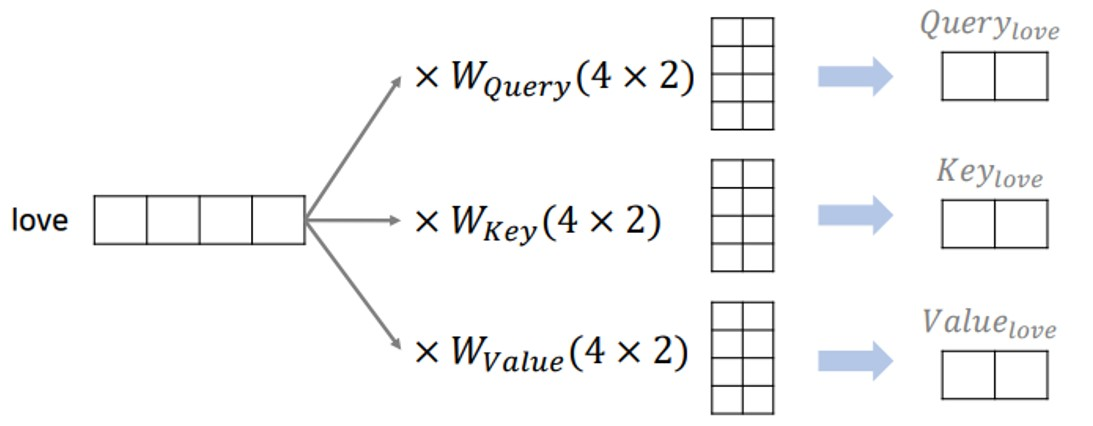

다음의 그림과 같이 간단하게 하나의 단어 있다고 가정을 해보겠습니다.  

하나의 단어가 임베딩 차원으로 표현되고 있는 상태에서 이제 linear layer를 거쳐서  
각각 query와 key, value 값을 만들수 있습니다.

이때 임베팅 차원은 d_model이라고 할수있고 원본 논문에서는 임베딩 차원을 512차원으로 사용합니다  
이때 head의 갯수가 8개라고 하면 d_model/h에서 512를 8로 나눈 64 만큼  
각각의 query, key,  value의 차원이 구성 되게 됩니다.  

여기서 보이는 그림은 간단하게 임베딩 차원은 4차원이고 head(h)가 2개인 상황을 가정합니다.  

즉 이럴때는 4 x 2 메트릭스가 만들어지게 됩니다.  
왜냐하면 4차원의 데이터를 2차원의 데이터로 매핑해야되기 때문에  
이렇게 4 x 2 가중치 메트릭스가 사용되게 됩니다.  

그래서 이런식으로 love라는 단어가 4차원으로 표현되어있다고 하면  
그래서 이거를 query_love, key_love, value_love 각각 2차원으로 구성되고 있는  
데이터로 표현될수 있는것입니다.  

### Scaled Dot-Product Attention

이와 같이 query와 key, value를 구하였다면 아래 수식을 통해 실제  
어텐션 스코어를 구할수 있습니다.  


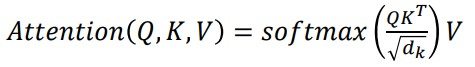

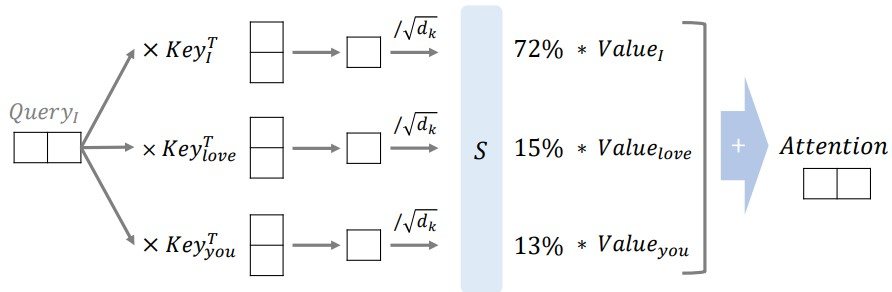

이때의 query_I는 각각의 다른 단어들 이 key와 행렬곱을 수행하여 하나의 어텐션 에너지 값을  
구할수 있게 됩니다.  

예를 들어 I love you 라는 하나의 문장이 들어오게 된다면 I라는 단어는  
I에 해당하는 key, love에 해당하는 key, you에 해당하는 key값과 각각 곱해져서  
하나의 어텐션 에너지 값을 구할수 있게 됩니다.  

아까전에 말했듯이 softmax에 들어가는 값을 normalization 해주기 위해서  
각각 스케일링 벡터로 나누어주게 됩니다.  

이후에 softmax(S)를 취하게 되서 실제로 각각의 key값에 대해서 어떠한 가중치를 가지는지를  
구해낼수 있는것입니다.  

여기에서 보이는 이 I 라는 단어는 I라는 단어와 72% 만큼의 높은 연관성을 가지고  
love 라는 단어와는 15%, you 라는 단어와는 13%를 가지며   
각각이 이러한 가중치를 가진다고 표현할수 있습니다. 

이렇게 각각의 가중치 값에다가 각각 value 값을 곱해준뒤에 전부 더해줘서  
결과적인 어텐션 value 값을 만들어 낼수 있습니다.  

즉 마찬가지로 weighted sum을 구해낼수 있습니다.  

바로 이러한 과정을 통해서 실제로 어텐션이 수행되는 것입니다.

## 트랜스포머의 동작 원리(행렬)

### 쿼리(Query), 키(Key), 값(Value)

실제로 전체 문장이 한꺼번에 입력되는 행렬과 같은 상황에서 다시 한번 확인해 보겠습니다.  

실제로는 행렬(matrix) 곱셈 연산을 이용해 한꺼번에 연산이 가능합니다.  

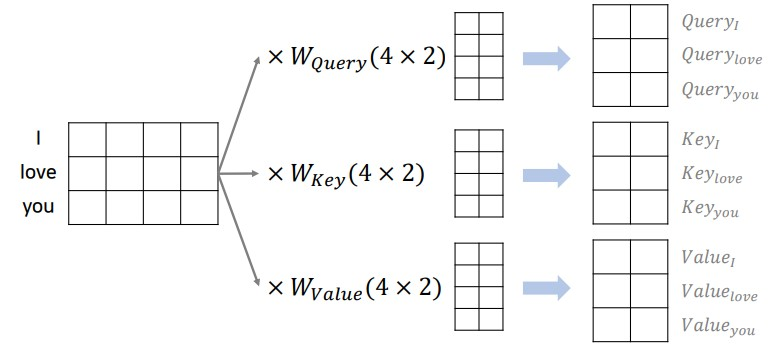

I love you라는 하나의 문장이 있고 임베딩 차원이 4차원이라고 하였을때 3 x 4 메트릭스로 구성이 되게 됩니다.  

이때 마찬가지로 하나의 헤드에 있는 query, key, value값을 구하기 위한 가중치 값이 다음과 같이 있다고 하겠습니다.  

현재 헤드에서는 I, love, you에 해당하는 각각의 query 값, key 값, value 값이 만들어지게 됩니다.   

### Scaled Dot-Product Attention

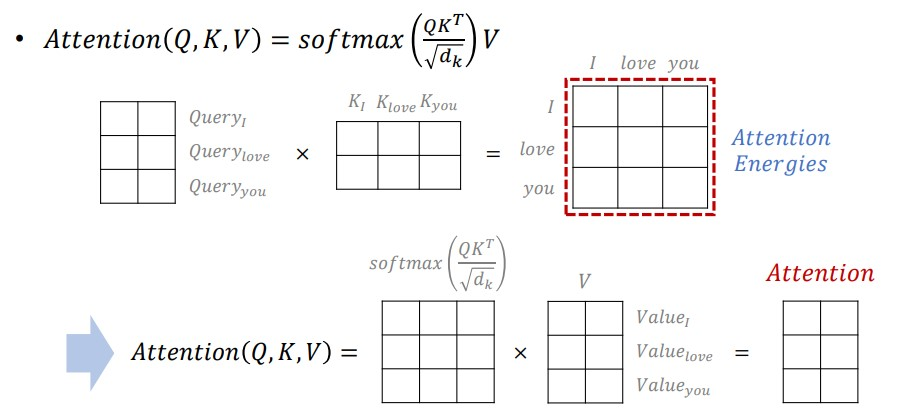

마찬가지로 query와 key, value값이 구해졌기 때문에 어텐션 value를 구할수 있게 되는것이고  
I와 love, you의 query값을 한번에 각 key값과 곱해주어서 Attention Energy를  
3 x 3으로 만들어 낼수 있습니다.  

이때의 Attention Energy 값은 각각의 단어가 각각의 key값에 대해서 얼마나 높은 연관성을 표현하는  
수치를 부여하였는지를 구할수 있습니다.  

즉 이런식으로 Attention Energy 값은 I와 love, you의 각각에 대해서 구해지는 방식으로  
이렇게 행과 열은 모두 단어의 갯수가 동일한 크기를 가집니다.  

각각의 단어가 서로에게 어떠한 연관성을 가지는지 구할수 있습니다.  

이제 여기에 softmax를 취해서 각각의 행마다 각 key에 대한 값들을 확률값으로  
구해낼수 있도록 만듭니다.  

그러한 가중치값들과 value값들을 곱해주어서 실제 Attention value 매트릭스를 구할수 있습니다.  

보시면 이렇게 Attention value 값 자체는 입력되었던 query와 key와 value와 모두 동일한 차원을  
가지게 됩니다.  

(이어서)

추가적으로 마스크 행렬(mask matrix)를 이용해 특정 단어는 무시할 수 있도록 합니다.  

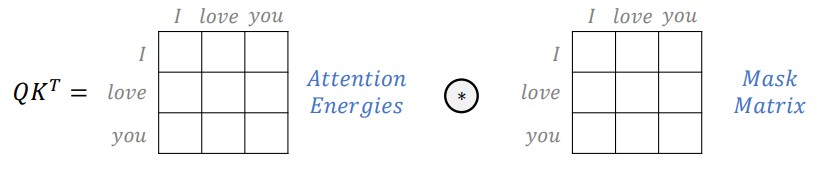

다음과 같이 Attention Energy 값이 있을때 Attention Energy와 같은차원에 mask matrix를 만들어서  
element-wise(엘레먼트 와이즈) 즉 각각의 원소단위로 곱해주어서  

어떠한 단어는 참고하지 않도록 만들수 있습니다.  

예를 들어서 I라는 단어는 love와 you에 해당하는 키값을 무시하도록  
즉 love 와 you는 어텐션하지 않도록 무시하고자 한다면  

이렇게 Attention Energy 값을 전부다 마이너스 무한이라고 할수 있는  
가능한 최대로 작은 값을 넣어주게 되면 실제로 softmax를 취해서  
어텐션 스코어 값을 구해졌을때 고려하지 않도록 처리가 된 단어들에 대해서  
모두 0%의 가중치를 가지게 됩니다.  

즉 mask matrix를 씌워줌으로서 특정한 단어는 무시해서 어텐션을 수행하지 않도록 만들수 있습니다.  

이와같이 mask matrix를 이용해서 attention energy를 마스크를 적용함으로서 특정 단언는 무시해서  
어텐션을 수행하지 않도록 만들수 있습니다.

---

### Multi-Head Attention

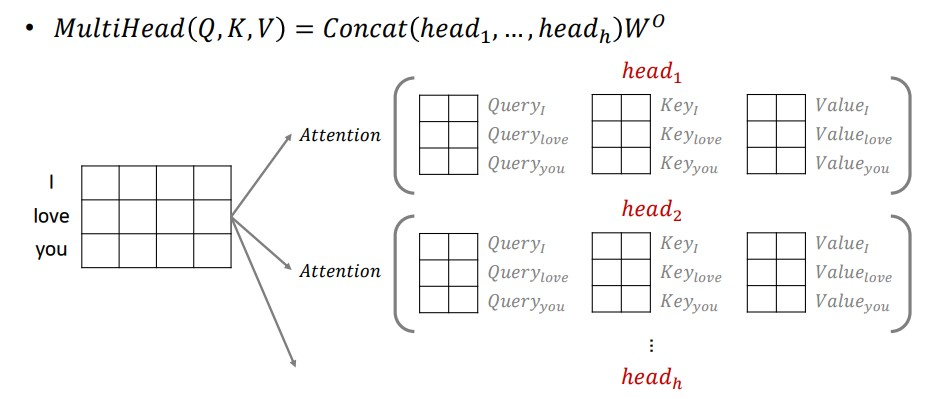

그래서 결과적으로 각각의 헤드마다 입력으로 들어온 query와 key, value와 같은 차원의 벡터를  
만들어 내기 때문에 이렇게 각 헤드마다 query와 key, value의 값들을 각각 넣어서    
어텐션을 수행하는 값들을 이렇게 head_1부터 head_h까지라고 했을때 이러한 정보들을   
다 feature로 쭉 연결하게 되면 다시 맨 처음에 입력이 되었던 입력 디멘션과 같은    
디멘션을 가지게 됩니다.    

(이어서)

MultiHead(Q, K, V)를 수행한 뒤에도 차원(dimension)이 동일하게 유지됩니다.  

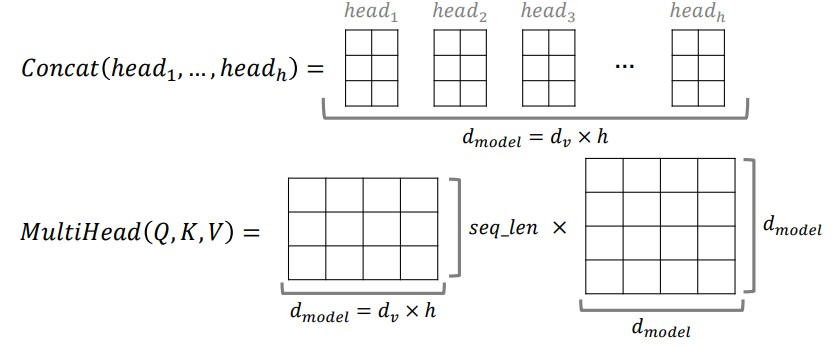

다시 말해 이런식으로 멀티헤드 어텐션은 각각의 헤드에 대해서 어텐션을 수행한 뒤에  
그러한 결과를 다시 쭉 이어 붙이기 때문에 결과적으로 만들어진 메트릭스에 열의 갯수는  
원래 입력의 임베딩 차원의 갯수와 동일한 차원의 갯수를 가집니다.  

그렇기 때문에 이제 마지막에 이 w 가중치 값으로 d_model x d_model 차원의 가지는 메트릭스를  
곱해줌으로서 결과적으로 멀티헤드어텐션 값을 구할수 있습니다.  

그런데 이렇게 하더라도 결과값은 입력디멘션과 정확히 동일하기 때문에   
이러한 멀티헤드어텐션을 수행한 뒤에도 차원이 동일하게 유지가 된다는 점이 특징입니다.   

### 어텐션(Attention)의 종류

트렌스포머에서는 세 가지 종류의 어텐션(attention) 레이어가 사용됩니다.  

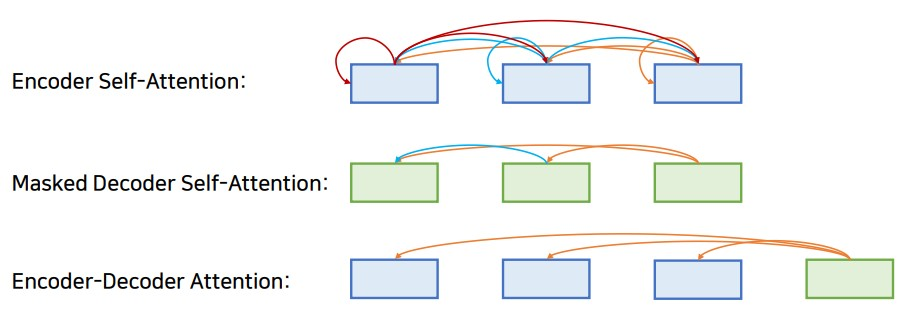

트랜스포머에서 쓰이는 어텐션은 항상 멀티헤드어텐션으로 헤드가 여러개인 어텐션이라고  
볼수 있는데 이제 그러한 어텐션이 사용되는 위치에 따라 다음과 같이 구분됩니다.  

- Encoder Self Attention  
각각의 단어들이 서로에게 어떠한 연관성을 가지는지 어텐션을 통해 구하게 만듭니다.   

- Masked Decoder Self-Attention  
앞쪽 단어에 대해서만 참고할수 있도록 만듬으로서 치팅을 하지않고  
정상적으로 모델을 학습할수 있도록 만듭니다.    

- Encoder-Decoder Attention  
각각의 출력단어들의 입력단어들중에서 어떤 정보에 더욱더 많은 가중치를 주는지를  
구할수 있어야 되는데 그러한 과정에서 디코더 부분에서의 Query 값이 인코더 부분에 있는  
key와 value값을 참조한다고 해서 Encoder-Decoder Attention이라고 합니다. 


### Self-Attention

Self-Attention은 인코더와 디코더 모두에서 사용됩니다.  
- 매번 입력 문장에서 각 단어가 다른 어떤 단어와 연관성이 높은 지 계산할 수 있습니다.  

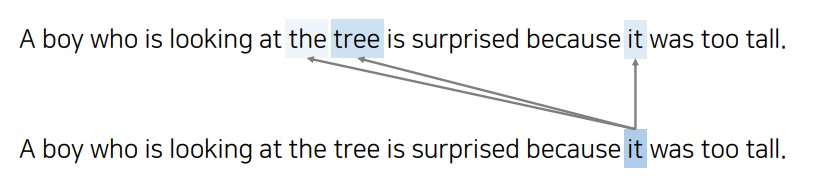

하나의 입력문장이 들어왔을때 각각의 단어들은 다른 모든 단어에 대해서  
어텐션 스코어 값을 구할수 있습니다.  

예를 들어 그림과 같이 문장이 있다고 했을때 각각의 단어들은 다른 단어 모두에 대해서  
얼마나 가중치를 부여할지를 어텐션을 통해서 계산할수 있습니다.  

예를 들어 `it`이라는 단어를 출력한다고 하면 `it` 은 앞쪽에 있는 `tree`와  
동일한 `it`이 되게됩니다.  
어텐션 스코어를 시각적으로 출력하게 만든다면 다음의 그림과 같이 나타나게 됩니다.


`tree`와 `it` 을 실제로 더 높은 스코어를 가지는 방식으로 학습이 될 가능성이 높습니다.  
그래서 이런식으로 각각의 단어들이 서로 어떠한 연관성을 가지는지를  
Self-Attention 과정을 통해서 시각화해볼수 있습니다.  

### 트렌스포머 구조 재확인

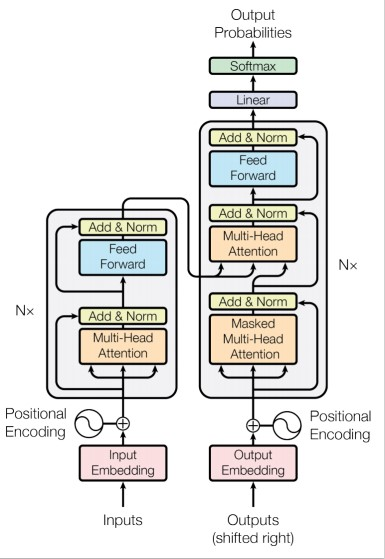

자 이제 결과적으로 앞에서 확인했던 이 트렌스포머에 전체 아키텍쳐에  
포함되어있는 내용들을 하나씩 확인하였습니다.  

인코더부분에서 입력값이 들어와서 위치에 대한 정보를 반영해준 입력을 실제로  
첫번째 레이어에 넣어주게 되고 인코더 레이어는 이제 n번만큼 반복이 되어서  
중첩해서 사용하게 되고 이제 그렇게 나온 마지막 레이어의 인코더 레이어의 출력값이  
각각의 디코더 레이어에 들어가게 된다고 보면 됩니다.  

이제 마찬가지로 디코더 레이어도 n번만큼 중첩이 되어서 가장 마지막에 나온 출력값에  
linear layer와 sofmax를 취해서 각각의 출력단어를 만들어 낼수 있습니다.  

다만 한가지 이야기 안한게 있다면 위치정보를 어떤식으로 넣을지에 대한 인코딩 함수입니다.  

### Positional Encoding

하나의 문장에 포함되어있는 각각의 단어들에 대한 상대적인 위치에 대한 정보를 모델에게  
알려주기 위해서 주기함수를 활용한 공식을 사용합니다.  

Positional Encoding은 다음과 같이 주기 함수를 활용한 공식을 사용합니다.  
- 각 단어의 상대적인 위치 정보를 네트워크에게 입력합니다.  

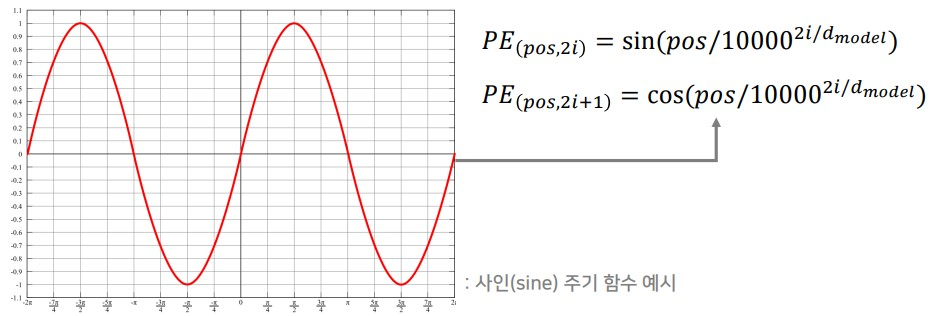

- PE: Positional Encoding의 약자  
- pos: 각각의 단어 번호  
- i: 각각의 단어에 대한 임베딩 값의 위치 하나하나를 의미  

그래서 이런식으로 sin함수와 같은 주기함수 값을 인코딩을 위해서 사용하는데  
이렇게 파라미터로 들어와 있는 10000 과 같은 값이나 sin과 cos 함수는 기본적인 sin, cos 말고  
다른 주기함수를 사용할수 있는것이고 아무튼 우리의 네트워크가 각각의 입력문장이 포함되어 있는  
각 단어들의 상대적인 위치들에 대한 정보를 알 수 있도록 이러한 주기성을 학습할수 있도록  
만들기만 한다면 어떠한 함수가 들어와도 사용할수 있습니다.  

그래서 원본논문에서도 이렇게 sin함수와 cos함수를 이용해서 정해진 함수값을 사용할수도 있지만  
우리가 위치에 대한 임베딩 값을 따로 학습하도록 만들어서 네트워크에 넣을수 있다고 말하고 있고  
실제로 그렇게 넣었을때도 이렇게 sin함수와 cos함수를 이용했을때와 실제로 성능상의 차이가 없었다고  
말하고 있습니다.  

그래서 실제로 트렌스포머 논문 이후에 나온 논문에 나온 아키텍쳐에서는 이러한 주기함수를  
사용하지않고 그냥 학습이 가능한 형태로 별도의 임베딩 레이어를 사용하기도 합니다. 

(이어서)

Positional Encoding은 다음과 같이 주기 함수를 활용한 공식을 사용합니다.  

이때 각 단어들은 d_model 만큼의 임베딩 차원을 가지게 되고 그림에서는 8의 값을 나타내고 있습니다.  

sin과 cos 값에 들어가는 pos값과 i값은 입력행렬값의 각각의 인덱스 값과 동일하게 들어갑니다.  

예를들어서 그림에서는 (0,3)이 되게 됩니다. 첫번째 단어의 4번째 임베딩이기 때문입니다.  

각각의 값들이 이제 함수에 들어가게 되어서 입력값과 정확히 동일한 디멘션을 가지는  
위치 인코딩을 만들어 낼수 있습니다.  

그래서 이제 값을 element-wise(엘레먼트 와이즈)로 값을 다 더해줘서 원소 by 원소로 다 더해준뒤에  
그 값을 실제로 각 인코더와 디코더 레이어에 입력값으로 사용한다고 보면 됩니다.  

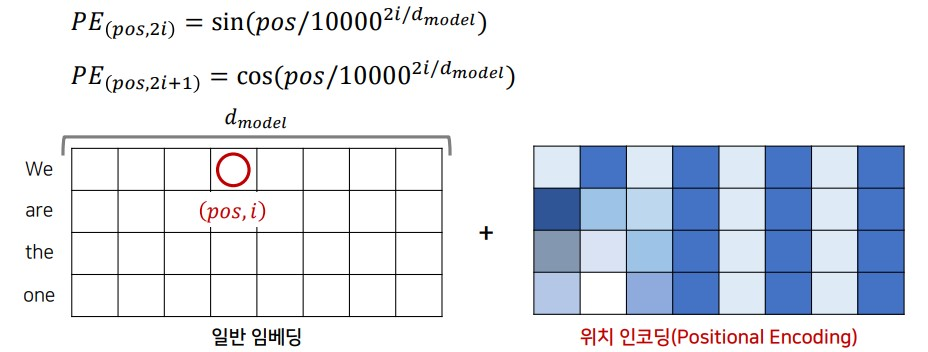

아래 그림의 코드는 n과 디멘션에 대해서 실제로 어떤식으로 각 단어의 위치에 대한 인코딩 정보가  
들어가는지를 그림으로 표현한것입니다.  

matplotlib 으로 간단하게 표현할수 있습니다.  

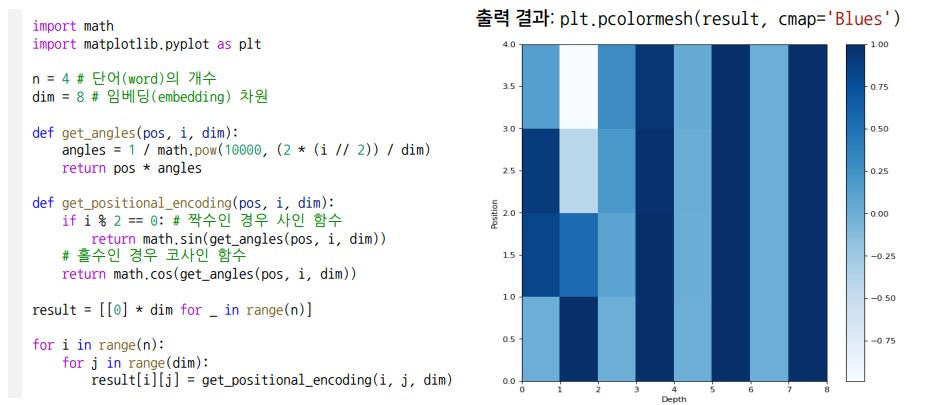

이상으로 트렌스포머의 동작원리에 대한 과정 설명을 마무리하도록 하겠습니다.  

감사합니다.  

---

[참고 자료]  

https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf  

https://www.youtube.com/watch?v=AA621UofTUA  


.